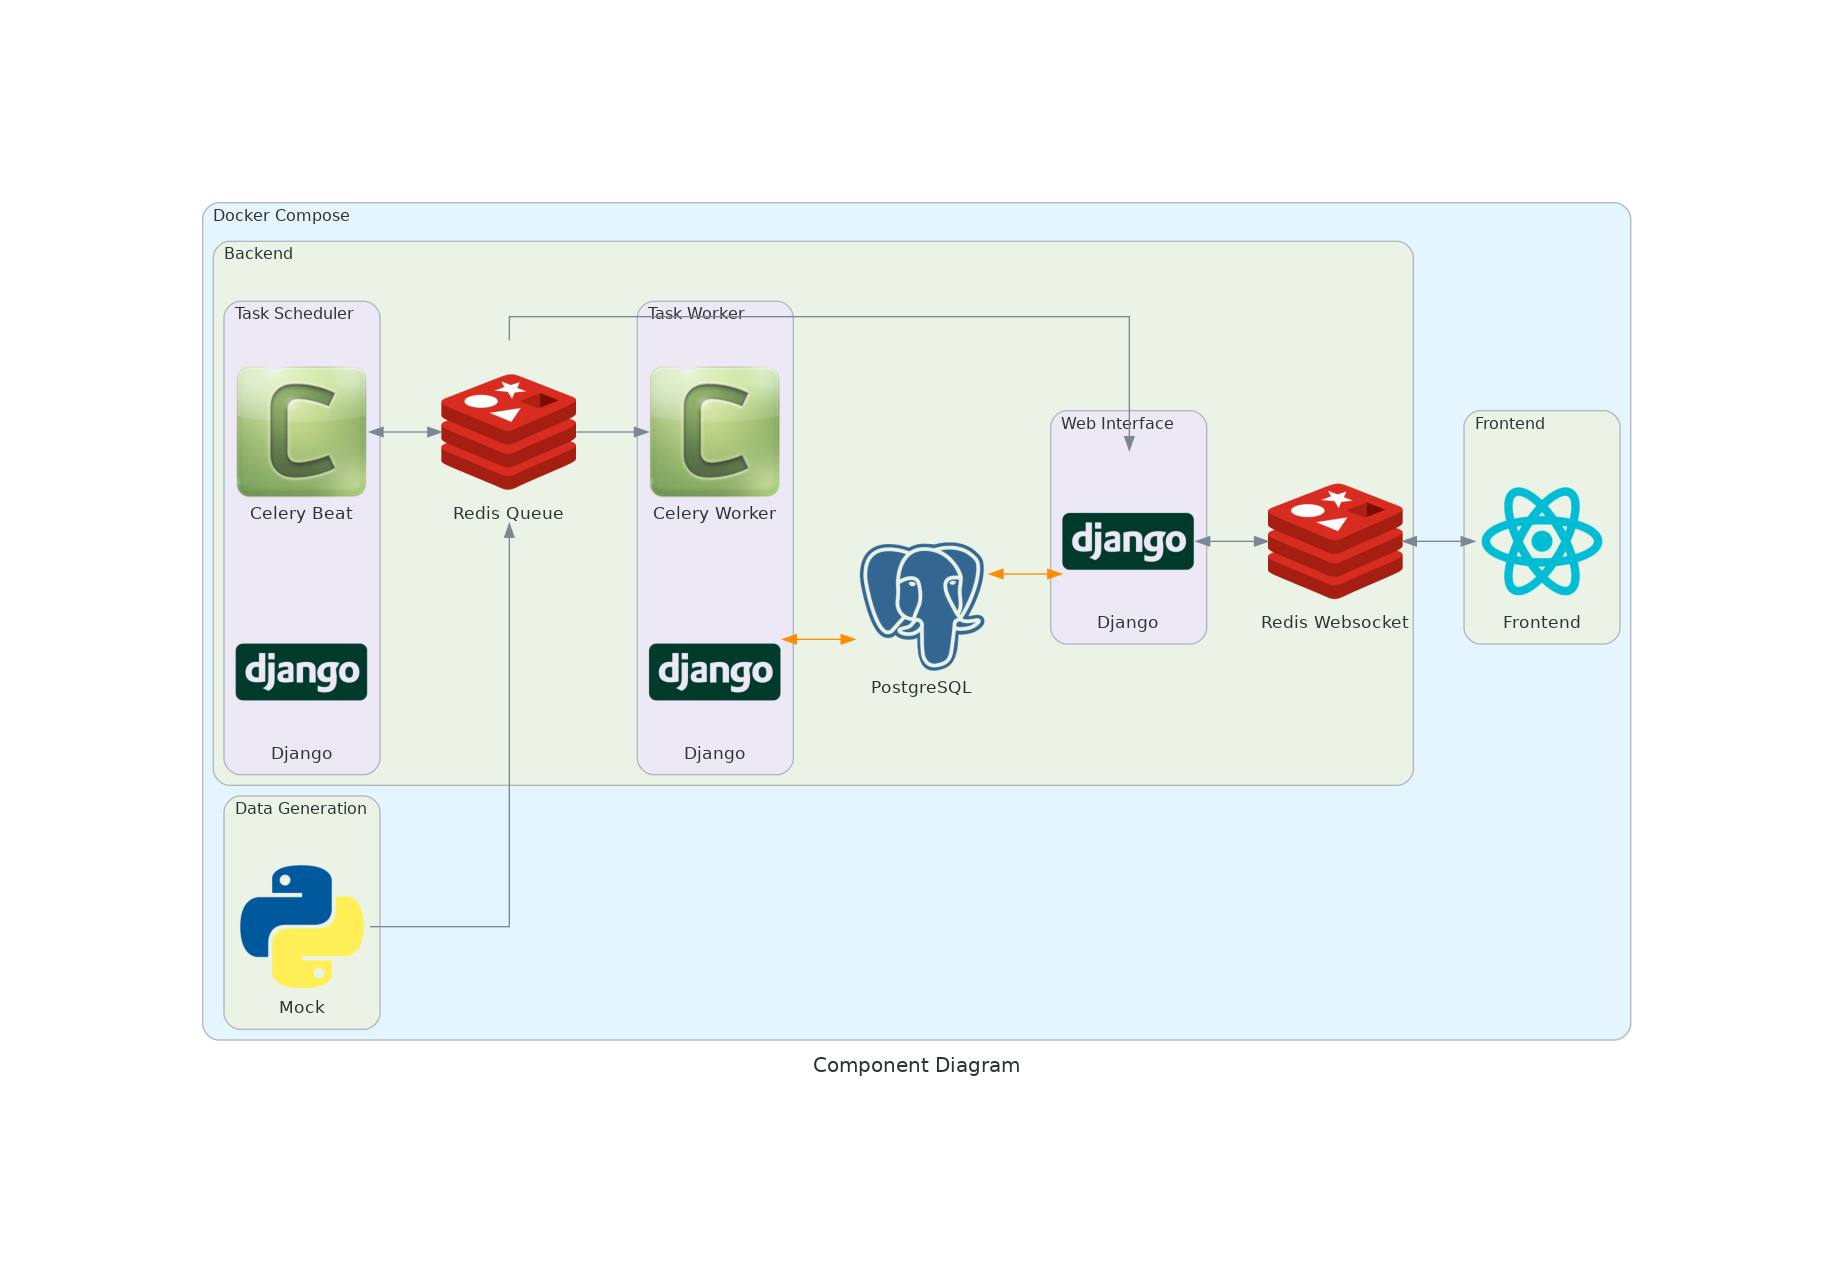

In [9]:
from diagrams import Diagram, Cluster, Edge
from diagrams.generic.network import Switch
from diagrams.generic.database import SQL
from diagrams.generic.device import Mobile
from diagrams.programming.framework import React
from diagrams.onprem.compute import Server
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.queue import Celery
from diagrams.programming.framework import Django
from diagrams.programming.language import Python

with Diagram("Component Diagram", show=True, direction="LR") as Diag:
    with Cluster("Docker Compose"):
        with Cluster("Backend"):
            with Cluster("Task Worker"):
                worker = Celery("Celery Worker")
                django_worker = Django("Django")

            with Cluster("Web Interface"):
                django_web = Django("Django")

            postgres = PostgreSQL("PostgreSQL")

            with Cluster("Task Scheduler"):
                beat = Celery("Celery Beat"),
                django_beat = Django("Django")

            redis_queue = Redis("Redis Queue")
            redis_websocket = Redis("Redis Websocket")

        with Cluster("Data Generation"):
            mock = Python("Mock")

        with Cluster("Frontend"):
            frontend = React("Frontend")

    mock >> redis_queue
    beat >> Edge() << redis_queue
    redis_queue >> django_web

    redis_queue >> worker
    django_worker >> Edge(color="darkorange") << postgres

    postgres >> Edge(color="darkorange") << django_web
    django_web >> Edge() << redis_websocket >> Edge() << frontend

Diag


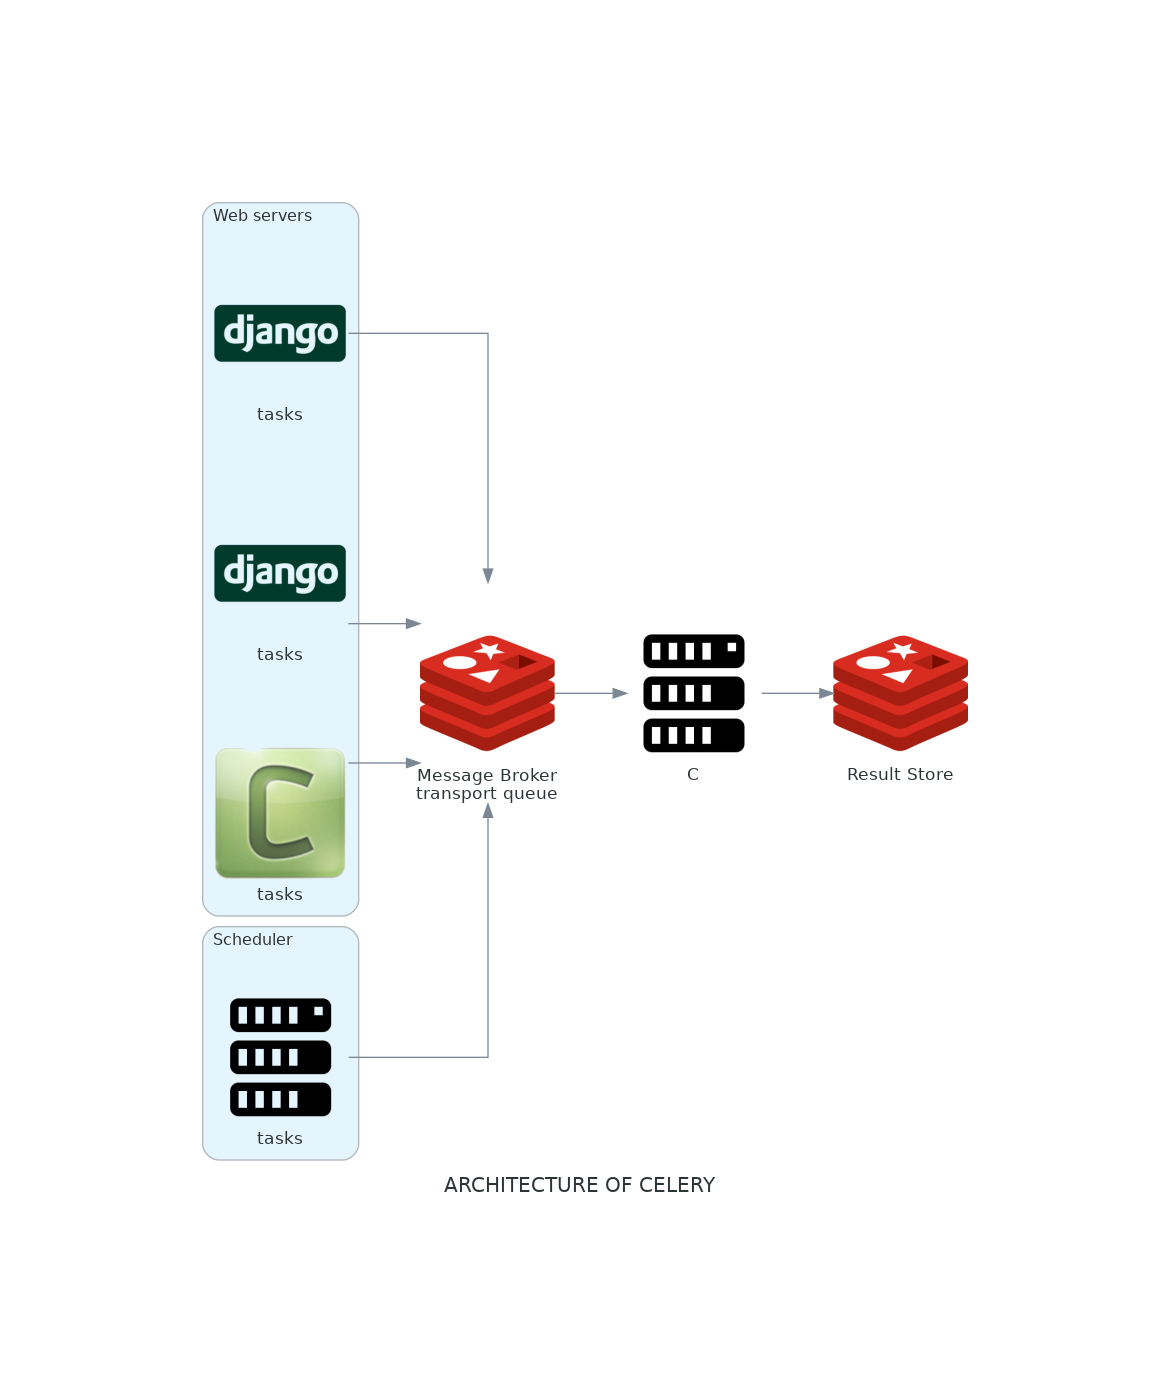

In [4]:
from diagrams import Cluster, Diagram
from diagrams.onprem.compute import Server
from diagrams.onprem.queue import ActiveMQ
from diagrams.programming.framework import Django
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.queue import Celery

with Diagram("ARCHITECTURE OF CELERY", show=False) as d:
    with Cluster("Web servers"):
        dj = Django("tasks")
        dj2 = Django("tasks")

    with Cluster("Scheduler"):
        celery = Celery("tasks")

    message_broker = Redis("Message Broker\ntransport queue")
    celery_worker = Server("C")
    result_store = Redis("Result Store")

    dj >> message_broker
    dj2 >> message_broker
    celery >> message_broker

    message_broker >> celery_worker >> result_store
    celery_scheduler >> message_broker

d
